In [1]:
import pandas as pd
import seaborn as sns
import os
from os import listdir
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

import numpy as np

import cv2

from sklearn.metrics import classification_report
from keras.models import load_model
import matplotlib.pyplot as plt

from keras.callbacks import CSVLogger
from keras import metrics
from keras import backend as K
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


Deeper fully connected NN after CNN layers

In [2]:
datasetAF = pd.read_csv("D:\\Dropbox\\utd\\cs courses\\cs 4375 machine learning\\assignments\\project\\rating csv data\\All_Ratings asian female csv.txt",header = 0)
avgPerFile = datasetAF['Rating'].groupby(datasetAF['Filename'],sort=False)
averagePerFileMean = avgPerFile.mean()
preparedAFDataset = pd.DataFrame({'Filename':averagePerFileMean.index, 'Avg Rating':averagePerFileMean.values})
labels = preparedAFDataset['Avg Rating']
labels

0       2.333333
1       3.950000
2       3.183333
3       2.683333
4       2.000000
5       1.566667
6       2.566667
7       2.750000
8       2.150000
9       3.433333
10      2.316667
11      2.083333
12      3.350000
13      1.716667
14      2.800000
15      2.100000
16      2.933333
17      2.566667
18      3.033333
19      2.733333
20      2.516667
21      2.416667
22      3.300000
23      2.433333
24      1.766667
25      2.250000
26      2.666667
27      2.266667
28      3.050000
29      3.100000
          ...   
1970    1.933333
1971    4.083333
1972    4.750000
1973    2.650000
1974    2.116667
1975    1.083333
1976    4.450000
1977    3.916667
1978    2.566667
1979    3.533333
1980    3.766667
1981    3.266667
1982    3.883333
1983    2.333333
1984    4.183333
1985    1.016667
1986    1.800000
1987    1.966667
1988    3.500000
1989    4.166667
1990    2.016667
1991    3.833333
1992    3.900000
1993    2.683333
1994    1.316667
1995    1.600000
1996    1.433333
1997    2.7333

In [3]:
#needed to join path because windows
train_path = os.path.join('C:/', 'Users/alegAsus/Downloads/SCUT-FBP5500_v2.1/SCUT-FBP5500_v2/AF/AF/')
images = []
#adapted from https://www.quora.com/How-do-I-load-train-and-test-data-from-the-local-drive-for-a-deep-learning-Keras-model
#listdir returns a list containing the names of the entries in the directory given by path.
for sample in listdir(train_path):
    img_path = train_path + sample #sample is every file in the train directory
    x = cv2.imread(img_path) #loading file
    x = cv2.resize(x, (96, 96))
    # preprocessing if required
    images.append(x) #adding to x_train array
#scale all pixels to between 0 and 1
imagesNumPy = np.array(images, dtype="float") / 255.0


In [4]:
(trainX, testX, trainY, testY) = train_test_split(imagesNumPy, labels,test_size=0.25, random_state=42)

In [5]:
#adapted from
#https://github.com/neuropoly/spinalcordtoolbox/issues/2279
#run this model with Dense(notDefinedVariable) to see functions in tensorflow that are to be depreciated
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=trainX.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
#1 because it outputs only one rating
model.add(Dense(1))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001)

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

# Let's train the model using RMSprop
model.compile(loss=root_mean_squared_error,
              optimizer=opt,
              metrics=[metrics.mae])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
csv_logger = CSVLogger(os.path.join('C:/', 'Users/alegAsus/Downloads/SCUT-FBP5500_v2.1/SCUT-FBP5500_v2/saved models/continous MAE/callbacks m2AF.log'), separator=',', append=False)
modelHistory = model.fit(trainX, trainY,
              batch_size=32,
              epochs=30,
              validation_data=(testX, testY),
              shuffle=True, callbacks=[csv_logger])

Train on 1500 samples, validate on 500 samples
Epoch 1/30
1500/1500 [==============================] - 70s 46ms/step - loss: 2.0504 - mean_absolute_error: 1.6775 - val_loss: 1.8651 - val_mean_absolute_error: 1.7067
Epoch 2/30
1500/1500 [==============================] - 65s 43ms/step - loss: 1.4342 - mean_absolute_error: 1.1489 - val_loss: 1.6152 - val_mean_absolute_error: 1.4425
Epoch 3/30
1500/1500 [==============================] - 65s 43ms/step - loss: 1.2738 - mean_absolute_error: 1.0328 - val_loss: 1.2483 - val_mean_absolute_error: 1.0573
Epoch 4/30
1500/1500 [==============================] - 65s 43ms/step - loss: 1.1813 - mean_absolute_error: 0.9620 - val_loss: 1.1911 - val_mean_absolute_error: 1.0006
Epoch 5/30
1500/1500 [==============================] - 65s 43ms/step - loss: 1.1145 - mean_absolute_error: 0.8961 - val_loss: 1.3409 - val_mean_absolute_error: 1.1594
Epoch 6/30
1500/1500 [==============================] - 65s 43ms/step - loss: 1.0993 - mean_absolute_error: 0.888

In [8]:
model_path = os.path.join('C:/', 'Users/alegAsus/Downloads/SCUT-FBP5500_v2.1/SCUT-FBP5500_v2/saved models/continous MAE/model2 AF.h5')
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:/Users/alegAsus/Downloads/SCUT-FBP5500_v2.1/SCUT-FBP5500_v2/saved models/continous MAE/model2 AF.h5 


In [9]:
modelHistory.history

{'val_loss': [1.865106481552124,
  1.615211431503296,
  1.2483036680221558,
  1.1910609378814698,
  1.3409343671798706,
  1.4403851737976074,
  1.3892343759536743,
  1.1492645339965821,
  1.2686244592666627,
  1.2040052909851073,
  1.4854756526947022,
  1.4437003984451293,
  1.4028323650360108,
  1.5600385913848878,
  1.3265429229736327,
  1.4156368293762207,
  1.4016493005752564,
  1.540762140274048,
  1.506212495803833,
  1.5278450384140014,
  1.4702295923233033,
  1.509856469154358,
  1.4990874385833741,
  1.297673656463623,
  1.292553780555725,
  1.225890048980713,
  1.2840076742172242,
  1.5119576396942138,
  1.346745810508728,
  1.419057014465332],
 'val_mean_absolute_error': [1.7067060623168946,
  1.442466010093689,
  1.057309112548828,
  1.0005866680145263,
  1.1594204540252686,
  1.2560303354263305,
  1.2045156040191651,
  0.9625840129852294,
  1.084724917411804,
  1.022655508041382,
  1.324480354309082,
  1.2650772037506104,
  1.2229885702133179,
  1.3889638862609863,
  1.153

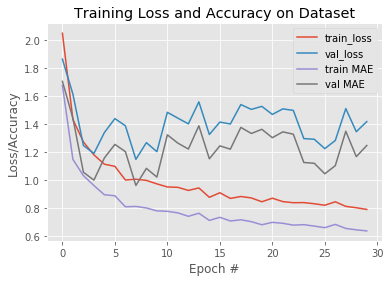

In [10]:
#N is the number of epochs
#plot code from https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/
N = 30
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), modelHistory.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), modelHistory.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), modelHistory.history["mean_absolute_error"], label="train MAE")
plt.plot(np.arange(0, N), modelHistory.history["val_mean_absolute_error"], label="val MAE")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

In [12]:
historyDF = pd.read_csv("C:\\Users\\alegAsus\\Downloads\\SCUT-FBP5500_v2.1\\SCUT-FBP5500_v2\\saved models\\continous MAE\\callbacks m2AF.log",header = 0)
historyDF.head(12)

,epoch,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,0,2.050428,1.677497,1.865106,1.706706
1,1,1.434212,1.148871,1.615211,1.442466
2,2,1.273809,1.032799,1.248304,1.057309
3,3,1.181322,0.961996,1.191061,1.000587
4,4,1.114508,0.896123,1.340934,1.159420
5,5,1.099295,0.888887,1.440385,1.256030
6,6,1.001801,0.810357,1.389234,1.204516
7,7,1.006911,0.812782,1.149265,0.962584
8,8,0.998861,0.801753,1.268624,1.084725
9,9,0.973849,0.780902,1.204005,1.022656


The lowest MAE is achieved at epoch 10

In [13]:
historyDF['val_mean_absolute_error'].min()

0.9625840129852294

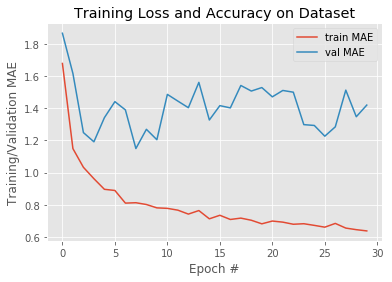

In [14]:
N = 30
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), historyDF.iloc[0:N, 2], label="train MAE")
plt.plot(np.arange(0, N), historyDF.iloc[0:N, 3], label="val MAE")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Training/Validation MAE")
plt.legend(loc="upper right")